Makaylah Cowan

Spring 2020

CS 251: Data Analysis and Visualization

Supervised learning

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Supervised learning

The overall goal of this project is to implement an email spam filter to determine whether an email is spam (*spam*) or not (*ham*). You will implement and compare the performance of two supervised learning algorithms: **K Nearest Neighbors (KNN)** and **Naive Bayes**.

## Task 1: K Nearest Neighbors (KNN) Classifier

To start off the project, you will implement the **KNN classifier**, a bedrock, highly-versatile, nonparametric (i.e. *memory-based*) supervised learning algorithm. You will test out and experiment with KNN on a **multi-class spiral 2D test dataset**.

### 1a) Load and visualize spiral data

- Below, load in both spiral datasets 1 (`spiral_train_1.csv`, `spiral_test_1.csv`) and 2 (`spiral_train_2.csv`, `spiral_test_2.csv`). Each training set has 4,000 samples and each test set has 1,200 samples.
- Create a 2x2 grid plot showing the train and test data side-by-side in each version of the dataset.
    - Be sure to label your subplots with informative titles (which datset are we looking at?).
    - Color-code the points based on their class.
    - Set the figure size to make everything clearly legible (not microscopic).

#### Format of spiral data

- Column 1: x coordinate of a 2D point (on a spiral).
- Column 2: y coordinate of a 2D point (on a spiral).
- Column 3: class. Which spiral arm does the point belong to? Labels: [0, 1, 2, 3]

In [2]:
spiral_1_train = np.loadtxt('data/spiral_train_1.csv', skiprows=1, delimiter=',')
spiral_1_test = np.loadtxt('data/spiral_test_1.csv', skiprows=1, delimiter=',')
spiral_2_train = np.loadtxt('data/spiral_train_2.csv', skiprows=1, delimiter=',')
spiral_2_test = np.loadtxt('data/spiral_test_2.csv', skiprows=1, delimiter=',')

spiral_1_train_y = spiral_1_train[:, 2]
spiral_1_test_y = spiral_1_test[:, 2]
spiral_2_train_y = spiral_2_train[:, 2]
spiral_2_test_y = spiral_2_test[:, 2]

spiral_1_trainclass = spiral_1_train[:, 2]
spiral_1_testclass = spiral_1_test[:, 2]
spiral_2_trainclass = spiral_2_train[:, 2]
spiral_2_testclass = spiral_2_test[:, 2]

spiral_1_train = spiral_1_train[:, :2]
spiral_1_test = spiral_1_test[:, :2]
spiral_2_train = spiral_2_train[:, :2]
spiral_2_test = spiral_2_test[:, :2]


print(f'Spiral 1 train {spiral_1_train.shape}, classes {spiral_1_train_y.shape}')
print(f'Spiral 1 test {spiral_1_test.shape}, classes {spiral_1_test_y.shape}')
print(f'Spiral 2 train {spiral_2_train.shape}, classes {spiral_2_train_y.shape}')
print(f'Spiral 2 test {spiral_2_test.shape}, classes {spiral_2_test_y.shape}')

Spiral 1 train (4000, 2), classes (4000,)
Spiral 1 test (1200, 2), classes (1200,)
Spiral 2 train (4000, 2), classes (4000,)
Spiral 2 test (1200, 2), classes (1200,)


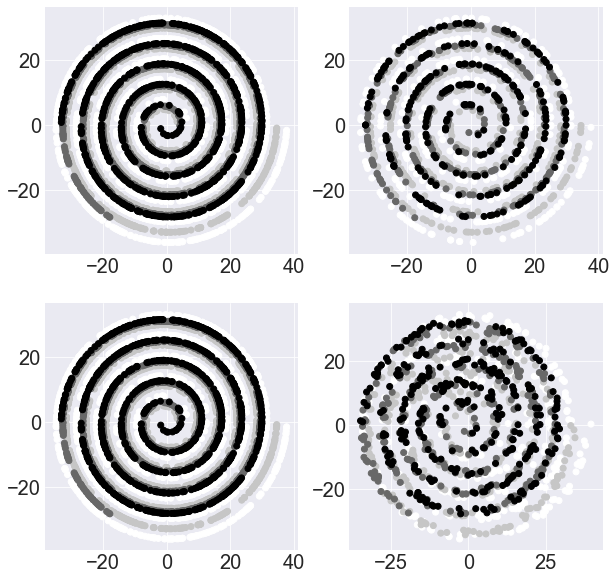

In [3]:
# Plot your spirals here
fig, ax = plt.subplots(2,2)

ax[0][0].scatter(spiral_1_train[:,0], spiral_1_train[:,1], c= spiral_1_trainclass)
ax[0][1].scatter(spiral_1_test[:,0], spiral_1_test[:,1], c=spiral_1_testclass)
ax[1][0].scatter(spiral_2_train[:,0], spiral_2_train[:,1], c = spiral_2_trainclass)
ax[1][1].scatter(spiral_2_test[:,0], spiral_2_test[:,1], c= spiral_2_testclass)
fig.set_figheight(10)
fig.set_figwidth(10)

### 1b) Implement KNN

Implement the following methods in `knn.py`. Test relevant methods using the test code below.

- Constructor
- `train(data, y)`: Train the KNN classifier on the data `data`, where training samples have corresponding class labels in `y`.
- `predict(data, k)`: Use the trained KNN classifier to predict the class label of each test sample in `data`. Determine class by voting: find the closest `k` training exemplars (training samples) and the class is the majority vote of the classes of these training exemplars.
- `accuracy(y, y_pred)`: Compute percent correct given true data labels `y` and algorithm predicted labels `y_pred`. 

In [4]:
from knn import KNN

#### Test: Accuracy

In [62]:
np.random.seed(0)
test_y = np.random.randint(low=0, high=11, size=(50,))
test_y_pred = np.random.randint(low=0, high=11, size=(50,))

classifier = KNN(num_classes=0)
acc = classifier.accuracy(test_y, test_y_pred)

Test accuracy is 0.06 and should be 0.06.


#### Test: 1-KNN

In [6]:
n_classes = 4
classifier = KNN(num_classes=n_classes)
classifier.train(spiral_1_train, spiral_1_train_y)

k = 1
spiral_1_y_pred = classifier.predict(spiral_1_train, k)
acc = classifier.accuracy(y=spiral_1_train_y, y_pred=spiral_1_y_pred)

Your accuracy with K=1 is 1.0 and should be 1.0


**Question 1:** Explain why in the above test, the accuracy must be 100%.

**Answer 1:** The accuracy must be 100% because the same data was used to train and test the algorithm. 

#### Test 2-KNN

In [1]:
n_classes = 4
classifier = KNN(num_classes=n_classes)
classifier.train(spiral_1_train, spiral_1_train_y)

k = 2
spiral_1_y_pred = classifier.predict(spiral_1_test, k)
acc = classifier.accuracy(y=spiral_1_test_y, y_pred=spiral_1_y_pred)
print(f'Your accuracy with K=2 is {acc:.2f} and should be 0.88')

true_test_y = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])



NameError: name 'KNN' is not defined

### 1c) Find the best `k`

- Below, "script" your `predict` method on both spiral datasets 1 and 2. Compute the accuracy on the respective test sets with many different values of `k`.
- Create two well-labeled plots, one for each spiral dataset, showing the accuracy for many different `k` values.

With k as 2  accuracy is 0.8791666666666667
With k as 5  accuracy is 0.7533333333333333
With k as 8  accuracy is 0.6908333333333333
With k as 11  accuracy is 0.6291666666666667
With k as 14  accuracy is 0.5741666666666667
With k as 17  accuracy is 0.535


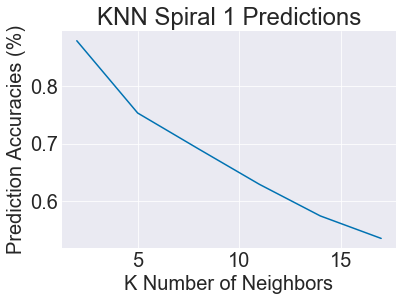

In [8]:
# Spiral 1 results here
k = 2
ks = []
acc = []
classifier.train(spiral_1_train, spiral_1_train_y)
for i in range(6):
    spiral_1_y_pred = classifier.predict(spiral_1_test, k)
    ac = classifier.accuracy(y=spiral_1_test_y, y_pred=spiral_1_y_pred)
    print("With k as",k, " accuracy is", ac)
    ks.append(k)
    acc.append(ac)
    k += 3
    
    
plt.title("KNN Spiral 1 Predictions")
plt.ylabel("Prediction Accuracies (%)")
plt.xlabel("K Number of Neighbors")
plt.plot(ks, acc)
    

With k as 2  accuracy is 0.43416666666666665
With k as 5  accuracy is 0.42083333333333334
With k as 8  accuracy is 0.44083333333333335
With k as 11  accuracy is 0.4658333333333333
With k as 14  accuracy is 0.4525
With k as 17  accuracy is 0.43666666666666665
With k as 20  accuracy is 0.4266666666666667
With k as 23  accuracy is 0.4091666666666667
With k as 26  accuracy is 0.39666666666666667
With k as 29  accuracy is 0.375


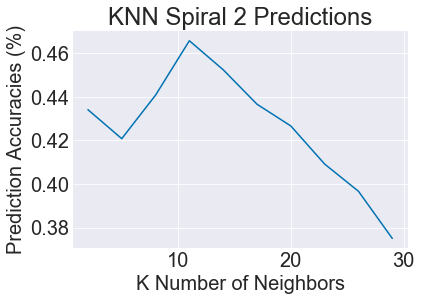

In [9]:
# Spiral 2 results here
k = 2
ks = []
acc = []
classifier.train(spiral_2_train, spiral_2_train_y)
for i in range(10):
    spiral_2_y_pred = classifier.predict(spiral_2_test, k)
    ac = classifier.accuracy(y=spiral_2_test_y, y_pred=spiral_2_y_pred)
    print("With k as",k, " accuracy is", ac)
    ks.append(k)
    acc.append(ac)
    k += 3
    
    
plt.title("KNN Spiral 2 Predictions")
plt.ylabel("Prediction Accuracies (%)")
plt.xlabel("K Number of Neighbors") 
plt.plot(ks, acc)

**Question 2:** What is the `k` that results in the highest accuracy on each spiral dataset?

**Answer 2:** Spiral 1 - k = 2. Spiral 2 - k = 11 

**Question 3:** Give at least one "good" reason why the accuracies are so different across the datasets. (*Hint: look at the data*)

**Answer 3:** The second spiral data set has a less 'defined' spiral shape between classes. There is more variance within classes and consequently more overlap which makes for more mistakes in labels.

**Question 4:** Give at least one "good" reason why the best `k` values are so different across the datasets.

**Answer 4:** Because there is more overlap, more k values for the second data set mean a better approximation for the region. However, because the first dataset has spiraled yet distinct groups, smaller k values work and bigger k values actually intercept other groups.

**Question 5:** What does it mean to have such different best `k` values when it comes to determining the class of a data sample?

**Answer 5:** It means that classes are more or less closer together (more close if k is low, and less close if k is high).

**Question 6:** Is it a good idea to always set `k` to one of these values when working with another dataset?

**Answer 6:** No, the appropriate k value (a k value that can be considered good) is dataset specific.

**Question 7:** Would linear regression be successful on this dataset? Briefly describe the advantages of either approach given the properties of the dataset.

**Answer 7:** No linear regression would not be successful on this dataset. It would take a really high degree polynomial to 'fit' to the data, but if implemented it could hug the dataset perfectly.

### 1d) Visualize class boundaries 

- Implement `plot_predictions` in `knn.py` to visualize how different regions of the (2D) dataspace would be classified. In this visualization, use four discrete colors to represent each of the classes. For example, if KNN would classify (x, y) = (10, 10) to spiral 2, you would color that region blue (for example). You will repeat this for lots of different regularly spaced x,y points to get a better picture of the regions that would be predicted to belong to different classes.
- Pick spiral dataset 1 or 2, then create 2-3 plots of the class boundaries with several different k values.

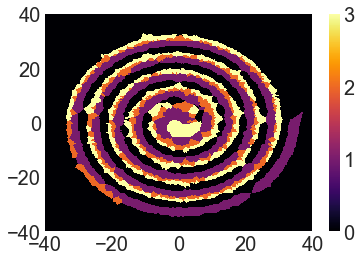

In [59]:
# Visualize KNN boundary 1
classifier.train(spiral_1_train, spiral_1_train_y)
classifier.plot_predictions(3,250)

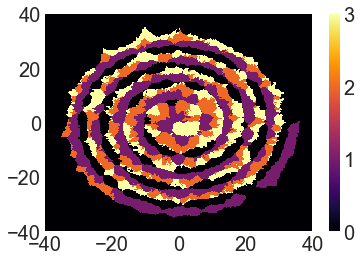

In [58]:
# Visualize KNN boundary 2
classifier.train(spiral_1_train, spiral_1_train_y)
classifier.plot_predictions(10,250)


**Question 8:** Describe the classification pattern for the different `k` values, and interpret relative to the best `k` accuracy values that you found above.

**Answer 8:** As the number of neighbors increases the spiral appears less "smooth". Because the points in the same class are next to each other a small k is able to accurately create the classes. However, increasing them makes the class identifications appear in blocks/circles as seen by the decreasing accuracies above.

### 2a) Determine email word frequency

- Download and extract the Enron emails from filer. You should see a base `enron` folder, with `spam` and `ham` subfolders (these are the 2 classes), and documents in each with the raw email text.
- In `email_preprocessor.py` implement `count_words(email_path)` to build up a python dictionary of all the words in the dataset (keys) and their associated counts (values).
- Write `find_top_words(word_freq)` to parse the dictionary and determine the top $W$ words.

In [ ]:
import email_preprocessor as epp

#### Test `count_words` and `find_top_words`

In [ ]:
word_freq, num_emails = epp.count_words()

In [ ]:
print(f'You found {num_emails} emails in the datset.')

In [ ]:
top_words, top_counts = epp.find_top_words(word_freq)
print(f"Your top 5 words are\n{top_words[:5]}\n")
print(f"The associated counts are\n{top_counts[:5]}\n")

### 2b) Make feature vectors based only on the top word counts

- Implement `make_feature_vectors`: Go back through the email folder structure and parse each email again. Now only count the frequency of words that are in the top $W$ word list. Keep track of whether each of these feature vectors are associated with a spam or not spam email.

In [ ]:
features, y = epp.make_feature_vectors(top_words, num_emails)

In [ ]:
print(f'Your matrix of features has shape {features.shape}.')
print(f'Your class label vector has shape {y.shape}.')
print(f'Your 1st few counts in your first feature vector are:\n{features[0,:10]}\n ')
print(f'The classes of the 1st few emails are\n{y[:5]}\n{y[-5:]}\n')

### 2c) Make train and test splits of the dataset

- Your matrix of features is for the entire dataset. We can't train the classifier on all these because then we won't have any emails left over to see how well your model's ability to discriminate spam/ham email generalizes to emails not seen during training. Like in the spiral dataset, implement `make_train_test_sets` to divide the email features into a 80/20 train/test split (80% of data used to train the supervised learning model, 20% we withhold and use for testing / prediction).

In [ ]:
np.random.seed(0)
x_train, y_train, inds_train, x_test, y_test, inds_test = epp.make_train_test_sets(features, y)

In [ ]:
print('Shapes for train/test splits:')
print(f'Train {x_train.shape}, classes {y_train.shape}')
print(f'Test {x_test.shape}, classes {y_test.shape}')

### 2d) Save data in binary format

It add a lot of overhead to have to run through your raw email -> train/test feature split every time you wanted to work on your project! In this step, you will export the data in memory to disk in a binary format. That way, you can quickly load all the data back into memory (directly in ndarray format) whenever you want to work with it again. No need to parse from text files!

- Use numpy's `save` function to make six files in `.npy` format (e.g. `email_train_x.npy`, `email_train_y.npy`, `email_train_inds.npy`, `email_test_x.npy`, `email_test_y.npy`, `email_test_inds.npy`).

In [ ]:
np.save('data/email_train_x.npy', x_train)
np.save('data/email_train_y.npy', y_train)
np.save('data/email_train_inds.npy', inds_train)
np.save('data/email_test_x.npy', x_test)
np.save('data/email_test_y.npy', y_test)
np.save('data/email_test_inds.npy', inds_test)